In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [49]:
catalog = fits.open('Catalogs/mlsdss_ages.fits')

In [51]:
catalog[1].columns

ColDefs(
    name = 'MJD'; format = 'J'; unit = 'd'
    name = 'PLATE'; format = 'I'
    name = 'FIBER'; format = 'J'
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '28A'
    name = 'source_id'; format = 'K'
    name = 'ref_epoch_gaia'; format = 'K'; unit = 'yr'
    name = 'SPT'; format = 'E'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'RA_ERR'; format = 'D'; unit = 'mas'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'DEC_ERR'; format = 'D'; unit = 'mas'
    name = 'PMRA'; format = 'D'; unit = 'mas/yr'
    name = 'PMRA_ERR'; format = 'D'; unit = 'mas/yr'
    name = 'PMDEC'; format = 'D'; unit = 'mas/yr'
    name = 'PMDEC_ERR'; format = 'D'; unit = 'mas/yr'
    name = 'RV'; format = 'E'; unit = 'km/s'
    name = 'RV_ERR'; format = 'E'; unit = 'km/s'
    name = 'RA_SDSS'; format = 'D'; unit = 'deg'
    name = 'DEC_SDSS'; format = 'D'; unit = 'deg'
    name = 'PSFMAG'; format = '5E'; unit = 'mag'
    name = 'PSFMAG_ERR'; format = '5E'; unit 

In [59]:
ages_all = catalog[1].data['Total_Age']
spt_all = catalog[1].data['SPT']
#spt_all2 = catalog[1].data['SpT']

In [62]:
mask_w_ages = ~np.isnan(ages_all)
ages = ages_all[mask_w_ages]
spt = spt_all[mask_w_ages]

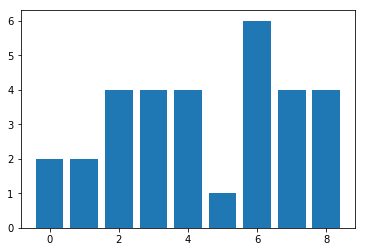

In [70]:
plt.hist(spt,bins=np.arange(0,10),histtype='bar',rwidth=0.8,align='left')
plt.show()

In [77]:
data = Table()

spt_keep = 6
mask_spt = spt_all == spt_keep

data['spt'] = spt_all[mask_spt]
data['age'] = ages_all[mask_spt]
data['lhalbol'] = catalog[1].data['LHALBOL'][mask_spt]
data['lhalbol_error'] = np.sqrt((1/(np.log(10)*catalog[1].data['LHALBOL'][mask_spt])*
                                 catalog[1].data['LHALBOL_ERR'][mask_spt])**2)
data['actha'] = catalog[1].data['ACTHA'][mask_spt]

print(len(data['spt']))

data.write('Catalogs/data.fits',format='fits',overwrite=True)

6241


In [84]:
np.percentile(data['lhalbol_error'],50)

0.22200624644756317

(-1, 25)

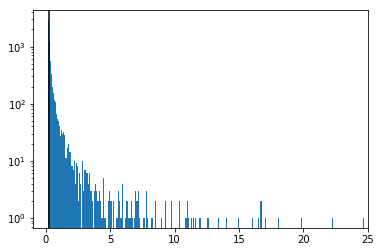

In [86]:
plt.hist(data['lhalbol_error'][data['lhalbol_error']<25],bins=300)
plt.axvline(x=np.median(data['lhalbol_error']),color='k')
plt.yscale('log')
plt.xlim(-1,25)